## Bag Of Words:

### simple example

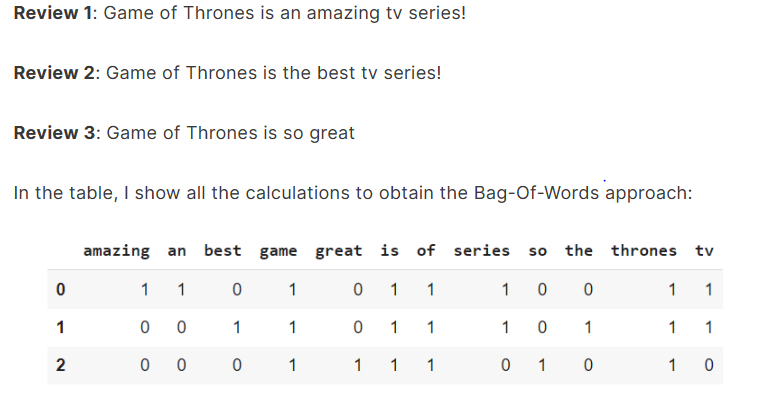

### 1. implementation with python

In [3]:
import pandas as pd
import numpy as np
import collections
import re
doc1 = 'Game of Thrones is an amazing tv series!'
doc2 = 'Game of Thrones is the best tv series!'
doc3 = 'Game of Thrones is so great'

In [4]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()
l_doc2 = re.sub(r"[^a-zA-Z0-9]", " ", doc2.lower()).split()
l_doc3 = re.sub(r"[^a-zA-Z0-9]", " ", doc3.lower()).split()

In [9]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz




wordset12 = np.union1d(l_doc1,l_doc2)
wordset =  np.union1d(wordset12,l_doc3)
print(wordset)

['amazing' 'an' 'best' 'game' 'great' 'is' 'of' 'series' 'so' 'the'
 'thrones' 'tv']


In [10]:
bow1 = calculateBOW(wordset,l_doc1)
bow2 = calculateBOW(wordset,l_doc2)
bow3 = calculateBOW(wordset,l_doc3)
df_bow = pd.DataFrame([bow1,bow2,bow3])
df_bow.head()

,amazing,an,best,game,great,is,of,series,so,the,thrones,tv
0,1,1,0,1,0,1,1,1,0,0,1,1
1,0,0,1,1,0,1,1,1,0,1,1,1
2,0,0,0,1,1,1,1,0,1,0,1,0


### Using NLTK for a basic BOW representation:

In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

corpus = ["This is a sample sentence.", "Another example sentence.", "And one more for good measure."]
words = [word.lower() for sentence in corpus for word in word_tokenize(sentence)]
freq_dist = FreqDist(words)
print(list(freq_dist.keys()))


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['this', 'is', 'a', 'sample', 'sentence', '.', 'another', 'example', 'and', 'one', 'more', 'for', 'good', 'measure']


### 2. Using CountVectorizer from scikit-learn:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# corpus = ["This is a sample sentence.", "Another example sentence.", "And one more for good measure."]
doc1 = 'Game of Thrones is an amazing tv series!'
doc2 = 'Game of Thrones is the best tv series!'
doc3 = 'Game of Thrones is so great'
corpus=[doc1, doc2, doc3]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())


[[1 1 0 1 0 1 1 1 0 0 1 1]
 [0 0 1 1 0 1 1 1 0 1 1 1]
 [0 0 0 1 1 1 1 0 1 0 1 0]]


### TF-IDF

In [22]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# assign documents
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'

# merge documents into a single corpus
string = [d0, d1, d2]

# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



idf values:
for : 1.6931471805599454
geeks : 1.2876820724517808
r2j : 1.6931471805599454

Word indexes:
{'geeks': 1, 'for': 0, 'r2j': 2}

tf-idf value:
  (0, 0)	0.5493512310263033
  (0, 1)	0.8355915419449176
  (1, 1)	1.0
  (2, 2)	1.0

tf-idf values in matrix form:
[[0.54935123 0.83559154 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


## NGrams


In [23]:
from nltk import ngrams, word_tokenize

# Sample sentence
sentence = "I love programming"

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Define the function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Generate bigrams (2-grams)
bigrams = generate_ngrams(words, 2)
print("Bigrams:", bigrams)

# Generate trigrams (3-grams)
trigrams = generate_ngrams(words, 3)
print("Trigrams:", trigrams)


Bigrams: ['I love', 'love programming']
Trigrams: ['I love programming']


## Word2vec

In [28]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action='ignore')


# Reads ‘alice.txt’ file
sample = open("IMP APPLICATION QUE.txt")
s = sample.read()

s

"1. Tell us more about why youâ€™re interested in this role:\n\nBecause, I have interested to solve business problems using data and my analytical skills. Along with this my technical skills are perfectly Matching for this position, and I have been interned for 6+ months as a data scientist, where I apply various ML and DL algorithms for model building, also worked on EDA part of data, MYSQL database, Tableau for Data Visualization, and I am efficient in python.\nAnd it may also align with my personal interests, such as a passion for technology, statistics, or problem-solving. \n\n2. Please share the knowledge, skills and experience you would bring to the role:\n\nI have the good understanding of Natural Language Processing (NLP) tasks such as text classification, language translation, and summarization, Predictive modeling and statistical analysis, Data visualization and data cleaning, Programming languages Python, Machine learning libraries such as scikit-learn and TensorFlow, Data S

In [29]:
# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []

	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)
    
data




[['1', '.'],
 ['tell',
  'us',
  'more',
  'about',
  'why',
  'youâ€™re',
  'interested',
  'in',
  'this',
  'role',
  ':',
  'because',
  ',',
  'i',
  'have',
  'interested',
  'to',
  'solve',
  'business',
  'problems',
  'using',
  'data',
  'and',
  'my',
  'analytical',
  'skills',
  '.'],
 ['along',
  'with',
  'this',
  'my',
  'technical',
  'skills',
  'are',
  'perfectly',
  'matching',
  'for',
  'this',
  'position',
  ',',
  'and',
  'i',
  'have',
  'been',
  'interned',
  'for',
  '6+',
  'months',
  'as',
  'a',
  'data',
  'scientist',
  ',',
  'where',
  'i',
  'apply',
  'various',
  'ml',
  'and',
  'dl',
  'algorithms',
  'for',
  'model',
  'building',
  ',',
  'also',
  'worked',
  'on',
  'eda',
  'part',
  'of',
  'data',
  ',',
  'mysql',
  'database',
  ',',
  'tableau',
  'for',
  'data',
  'visualization',
  ',',
  'and',
  'i',
  'am',
  'efficient',
  'in',
  'python',
  '.'],
 ['and',
  'it',
  'may',
  'also',
  'align',
  'with',
  'my',
  'persona

### CBOW model (becoz we are taking window size =5 means we are giving 5 words and it will predict target)

In [34]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
								vector_size=100, window=5)

# Print results
print("Cosine similarity  ",
	model1.wv.similarity('clustering', 'classification'))




Cosine similarity   -0.026966918


In [41]:
## most similar words
# Find similar words
similar_words = model1.wv.most_similar('organization', topn=3)
print("Words similar to 'natural':", similar_words)

Words similar to 'natural': [('interested', 0.3019444942474365), ('6+', 0.29597869515419006), ('good', 0.2709507644176483)]


### SKIP Gram model (we  provide sg= 1 means takes only one word as an input and then predicts the closely related context words. 

In [36]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)
 
# Print results
print("Cosine similarity  ",
      model2.wv.similarity('clustering', 'classification'))
 


Cosine similarity   0.52833897


In [42]:
## most similar words
# Find similar words
similar_words = model2.wv.most_similar('organization', topn=3)
print("Words similar to 'natural':", similar_words)

Words similar to 'natural': [(',', 0.8097289204597473), ('data', 0.8094510436058044), ('{', 0.8074706196784973)]


## Glove

### There are two main approaches to using GloVe in Python for word embeddings and finding similar words:

#### 1. Using pre-trained GloVe vectors
#### 2. training own glove model

### 1. Using pre-trained GloVe vectors

####  a. Download pre-trained vectors:

You can download pre-trained GloVe vectors from the official website: https://nlp.stanford.edu/projects/glove/. Choose the model size based on your needs (e.g., 50, 100, 200, 300 dimensions).

#### b. Load the vectors in Python:

There are several libraries that can help you load pre-trained GloVe vectors. Here are some popular options:

Gensim: This library provides convenient functions for loading and accessing GloVe vectors. You can load the vectors like this:

In [ ]:
from gensim.models import KeyedVectors

glove_path = "glove.6B.50d.txt"
model = KeyedVectors.load_word2vec_format(glove_path)


#### NLTK: The Natural Language Toolkit also has a module for loading GloVe vectors:



In [ ]:
from nltk.corpus import wordnet

glove = wordnet.WordNet().load_embeddings("glove.6B.50d.txt")

In [ ]:
similar_words = model.most_similar("king", topn=10)
print(similar_words)

### 2. training own glove model

##### The corpus.fit takes two arguments:

lines — this is the 2D array we created after the pre-processing

window — this is the distance between two words algo should consider to find some relationship between them
Parameters of Glove:

no_of_components — This is the dimension of the output vector generated by the GloVe

learning_rate — Algo uses gradient descent so learning rate defines the rate at which the algo reaches towards the minima (lower the rate more time it takes to learn but reaches the minimum value)

##### Parameters of glove.fit :

cooccurence_matrix: the matrix of word-word co-occurrences

epochs: this defines the number of passes algo makes through the data set

no_of_threads: number of threads used by the algo to run